In [182]:
import pandas as pd
import os
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [183]:
folder_path = 'D:\\Program Files (x86)\\百度云同步盘\\Dropbox\\-E·J- 2014.5.1\\2016.12.15 店小秘数据分析\\2021.12.21 海鹰数据'

In [184]:
country_list = ['my', 'tw', 'id', 'th', 'ph', 'sg', 'vn', 'br', 'mx', 'co', 'cl', 'pl']

In [185]:
currency_list = {
    'my': 0.24,
    'tw': 0.036,
    'id': 0.000070,
    'th': 0.030,
    'ph': 0.020,
    'sg': 0.73,
    'vn': 0.000044,
    'br': 0.17,
    'mx': 0.048,
    'co': 0.00025,
    'cl': 0.0012,
    'pl': 0.24
}

In [186]:
columns_rename = {
    '商品总数': '商品总数 - 跨境',
    'Unnamed: 3': '商品总数 - 本土',
    'Unnamed: 4': '商品总数 - 总数',
    
    '月销件数': '月销件数 - 跨境',
    'Unnamed: 6': '月销件数 - 本土',
    'Unnamed: 7': '月销件数 - 总数',
    
    '月销金额': '月销金额 - 跨境',
    'Unnamed: 9': '月销金额 - 本土',
    'Unnamed: 10': '月销金额 - 总数'
}

In [187]:
# df_country = pd.read_excel(file_path, sheetname='my')
# df_country.head()

In [188]:
# list(df_country[df_country['序号'].isnull()]['类目名称'].iloc[1:])

In [189]:
# df_country = df_country[df_country['序号']>0]

In [190]:
df_country_list = []

for country in country_list:
    df_country = pd.DataFrame()
    file_path = os.path.join(folder_path, 'shopee各市场各品类销量.xlsx')
    df_country = pd.read_excel(file_path, sheetname=country)
    df_country = df_country.rename(columns=columns_rename)
    
    cat_chinese_name = list(df_country[df_country['序号'].isnull()]['类目名称'].iloc[1:])

    df_country = df_country[df_country['序号']>0]
    
    if country == 'tw':
        df_country['类目中文名'] = df_country['类目名称']
    else:
        df_country['类目中文名'] = cat_chinese_name
        
    df_country['country'] = country
    df_country['currency'] = currency_list[country]
    df_country_list.append(df_country)
    
df_country_total = pd.concat(df_country_list)
df_country_total.head()

,序号,类目名称,商品总数 - 跨境,商品总数 - 本土,商品总数 - 总数,月销件数 - 跨境,月销件数 - 本土,月销件数 - 总数,月销金额 - 跨境,月销金额 - 本土,月销金额 - 总数,类目中文名,country,currency
1,1.0,Home & Living,1901396,2493762,4395158,1895524,15381226,17276750,2.13867e+07,8.30407e+09,8.32545e+09,居家生活,my,0.24
3,2.0,Fashion Accessories,804244,398436,1202680,1711225,1674832,3386057,7.20583e+06,1.51612e+08,1.58818e+08,时尚配饰,my,0.24
5,3.0,Mobile & Accessories,1337663,765333,2102996,971208,2507536,3478744,1.67133e+07,8.87944e+07,1.05508e+08,手机及配件,my,0.24
7,4.0,Women Clothes,846187,492805,1338992,898144,1687548,2585692,1.69268e+07,3.47361e+07,5.16629e+07,女装,my,0.24
9,5.0,Health & Beauty,666297,2196920,2863217,875940,10960588,11836528,2.08082e+08,1.01471e+09,1.22279e+09,健康与美容,my,0.24


In [191]:
# 金额 * 汇率
df_country_total['月销金额 - 跨境usd'] = df_country_total['月销金额 - 跨境'] * df_country_total['currency']
df_country_total['月销金额 - 本土usd'] = df_country_total['月销金额 - 本土'] * df_country_total['currency']
df_country_total['月销金额 - 总数usd'] = df_country_total['月销金额 - 总数'] * df_country_total['currency']

# 客单价
# df_country_total['客单价 - 跨境usd'] = df_country_total['月销金额 - 跨境usd'] / df_country_total['月销件数 - 跨境']
# df_country_total['客单价 - 本土usd'] = df_country_total['月销金额 - 本土usd'] / df_country_total['月销件数 - 本土']
# df_country_total['客单价 - 总数usd'] = df_country_total['月销金额 - 总数usd'] / df_country_total['月销件数 - 总数']

In [192]:
df_country_total.columns

Index(['序号', '类目名称', '商品总数 - 跨境', '商品总数 - 本土', '商品总数 - 总数', '月销件数 - 跨境',
       '月销件数 - 本土', '月销件数 - 总数', '月销金额 - 跨境', '月销金额 - 本土', '月销金额 - 总数',
       '类目中文名', 'country', 'currency', '月销金额 - 跨境usd', '月销金额 - 本土usd',
       '月销金额 - 总数usd'],
      dtype='object')

# 汇总

In [193]:
# 按跨境月销件数排名
df_country_total.groupby(['country']).agg({
    '商品总数 - 跨境': 'sum',
    '商品总数 - 本土': 'sum',
    '商品总数 - 总数': 'sum',
    '月销件数 - 跨境': 'sum',
    '月销件数 - 本土': 'sum',
    '月销件数 - 总数': 'sum',
    '月销金额 - 跨境usd': 'sum',
    '月销金额 - 本土usd': 'sum',
    '月销金额 - 总数usd': 'sum'
}).sort_values(by='月销件数 - 跨境',ascending=False)

,月销件数 - 总数,月销件数 - 跨境,商品总数 - 本土,月销件数 - 本土,商品总数 - 总数,月销金额 - 跨境usd,月销金额 - 本土usd,商品总数 - 跨境,月销金额 - 总数usd
country,,,,,,,,,
tw,234378823,10088072,18644563,224290751,27097527,2.514724e+07,2.450049e+08,8452964,2.701522e+08
my,69330646,9280063,14088841,60050583,23751442,7.979608e+07,1.496242e+11,9662601,1.497040e+11
br,39305792,5202652,6413118,34103140,8746390,2.087496e+07,1.205708e+08,2333272,1.414458e+08
ph,76339071,5119614,11555760,71219457,21172781,1.337032e+07,3.001618e+08,9617021,3.135321e+08
sg,7732473,3868333,1242009,3864140,6096426,2.470875e+07,6.373751e+07,4854417,8.844626e+07
th,44102320,3349922,12381335,40752398,16629065,7.971148e+06,3.646395e+08,4247730,3.726107e+08
vn,42006979,2441544,14776774,39565435,18524452,3.582650e+06,2.160549e+08,3747678,2.196376e+08
id,256160712,2272502,49843582,253888210,50751718,4.309021e+06,7.350871e+08,908136,7.393961e+08
mx,2447903,1830019,51078,617884,680627,6.141695e+06,1.917421e+06,629549,8.059115e+06


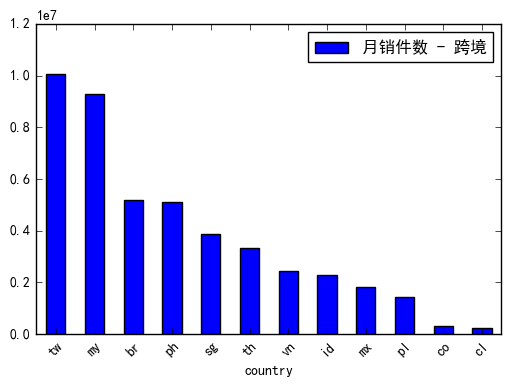

In [194]:
# 按跨境月销件数排名
df_country_total.groupby(['country']).agg({
    '商品总数 - 跨境': 'sum',
    '商品总数 - 本土': 'sum',
    '商品总数 - 总数': 'sum',
    '月销件数 - 跨境': 'sum',
    '月销件数 - 本土': 'sum',
    '月销件数 - 总数': 'sum',
    '月销金额 - 跨境usd': 'sum',
    '月销金额 - 本土usd': 'sum',
    '月销金额 - 总数usd': 'sum'
}).sort_values(by='月销件数 - 跨境',
               ascending=False).reset_index().plot(kind='bar',
                                                   x='country',
                                                   y=['月销件数 - 跨境'],
#                                                    secondary_y='月销件数 - 本土',
                                                   rot=45)
plt.show()

In [195]:
# 按跨境销售额排名
df_country_total.groupby(['country']).agg({
    '商品总数 - 跨境': 'sum',
    '商品总数 - 本土': 'sum',
    '商品总数 - 总数': 'sum',
    '月销件数 - 跨境': 'sum',
    '月销件数 - 本土': 'sum',
    '月销件数 - 总数': 'sum',
    '月销金额 - 跨境usd': 'sum',
    '月销金额 - 本土usd': 'sum',
    '月销金额 - 总数usd': 'sum'
}).sort_values(by='月销金额 - 跨境usd',ascending=False)

,月销件数 - 总数,月销件数 - 跨境,商品总数 - 本土,月销件数 - 本土,商品总数 - 总数,月销金额 - 跨境usd,月销金额 - 本土usd,商品总数 - 跨境,月销金额 - 总数usd
country,,,,,,,,,
my,69330646,9280063,14088841,60050583,23751442,7.979608e+07,1.496242e+11,9662601,1.497040e+11
tw,234378823,10088072,18644563,224290751,27097527,2.514724e+07,2.450049e+08,8452964,2.701522e+08
sg,7732473,3868333,1242009,3864140,6096426,2.470875e+07,6.373751e+07,4854417,8.844626e+07
br,39305792,5202652,6413118,34103140,8746390,2.087496e+07,1.205708e+08,2333272,1.414458e+08
ph,76339071,5119614,11555760,71219457,21172781,1.337032e+07,3.001618e+08,9617021,3.135321e+08
th,44102320,3349922,12381335,40752398,16629065,7.971148e+06,3.646395e+08,4247730,3.726107e+08
mx,2447903,1830019,51078,617884,680627,6.141695e+06,1.917421e+06,629549,8.059115e+06
id,256160712,2272502,49843582,253888210,50751718,4.309021e+06,7.350871e+08,908136,7.393961e+08
vn,42006979,2441544,14776774,39565435,18524452,3.582650e+06,2.160549e+08,3747678,2.196376e+08


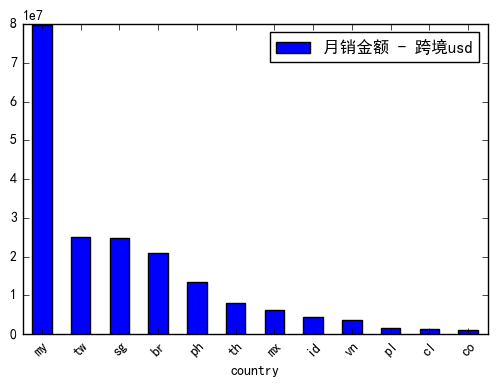

In [196]:
# 按跨境销售额排名
df_country_total.groupby(['country']).agg({
    '商品总数 - 跨境': 'sum',
    '商品总数 - 本土': 'sum',
    '商品总数 - 总数': 'sum',
    '月销件数 - 跨境': 'sum',
    '月销件数 - 本土': 'sum',
    '月销件数 - 总数': 'sum',
    '月销金额 - 跨境usd': 'sum',
    '月销金额 - 本土usd': 'sum',
    '月销金额 - 总数usd': 'sum'
}).sort_values(by='月销金额 - 跨境usd',
               ascending=False).reset_index().plot(kind='bar',
                                                   x='country',
                                                   y=['月销金额 - 跨境usd'],
#                                                    secondary_y='月销件数 - 本土',
                                                   rot=45)
plt.show()

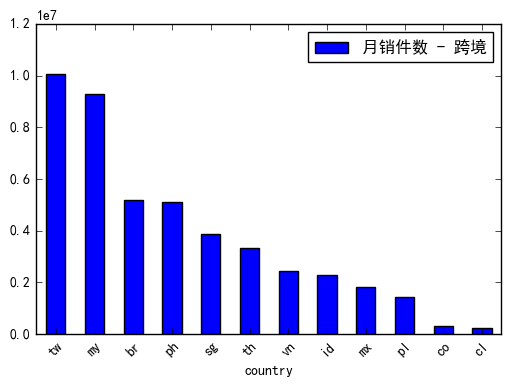

In [218]:
# 按跨境销售件数排名
df_country_total.groupby(['country']).agg({
    '商品总数 - 跨境': 'sum',
    '商品总数 - 本土': 'sum',
    '商品总数 - 总数': 'sum',
    '月销件数 - 跨境': 'sum',
    '月销件数 - 本土': 'sum',
    '月销件数 - 总数': 'sum',
    '月销金额 - 跨境usd': 'sum',
    '月销金额 - 本土usd': 'sum',
    '月销金额 - 总数usd': 'sum'
}).sort_values(by='月销件数 - 跨境',
               ascending=False).reset_index().plot(kind='bar',
                                                   x='country',
                                                   y=['月销件数 - 跨境'],
#                                                    secondary_y='月销件数 - 本土',
                                                   rot=45)
plt.show()

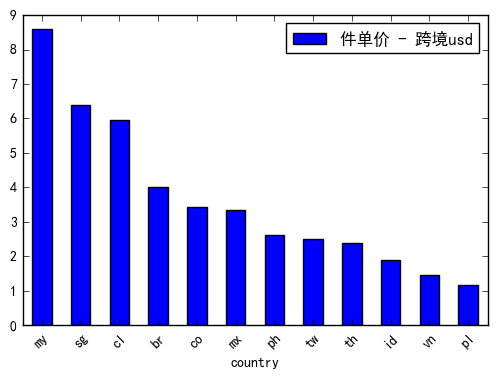

In [222]:
# 按跨境件单价排名
df_country_abs = df_country_total.groupby(['country']).agg({
    '商品总数 - 跨境': 'sum',
    '商品总数 - 本土': 'sum',
    '商品总数 - 总数': 'sum',
    '月销件数 - 跨境': 'sum',
    '月销件数 - 本土': 'sum',
    '月销件数 - 总数': 'sum',
    '月销金额 - 跨境usd': 'sum',
    '月销金额 - 本土usd': 'sum',
    '月销金额 - 总数usd': 'sum'
}).reset_index()

df_country_abs['件单价 - 跨境usd'] = df_country_abs['月销金额 - 跨境usd'] / df_country_abs['月销件数 - 跨境']
df_country_abs['件单价 - 本土usd'] = df_country_abs['月销金额 - 本土usd'] / df_country_abs['月销件数 - 本土']
df_country_abs['件单价 - 总数usd'] = df_country_abs['月销金额 - 总数usd'] / df_country_abs['月销件数 - 总数']

df_country_abs.sort_values(by='件单价 - 跨境usd',
               ascending=False).reset_index().plot(kind='bar',
                                                   x='country',
                                                   y=['件单价 - 跨境usd'],
#                                                    secondary_y='月销件数 - 本土',
                                                   rot=45)
plt.show()

# 国家明细

In [197]:
# vn（目前有在做，且做得不错的国家）
df_country_vn = df_country_total[df_country_total['country'] == 'vn']
df_country_vn.head()

,序号,类目名称,商品总数 - 跨境,商品总数 - 本土,商品总数 - 总数,月销件数 - 跨境,月销件数 - 本土,月销件数 - 总数,月销金额 - 跨境,月销金额 - 本土,月销金额 - 总数,类目中文名,country,currency,月销金额 - 跨境usd,月销金额 - 本土usd,月销金额 - 总数usd
1,1.0,Phụ Kiện & Trang Sức Nữ,576861,624022,1200883,669736,966960,1636696,8998509543,32791497092,41790006635,女士配饰和珠宝,vn,0.000044,395934,1.44283e+06,1.83876e+06
3,2.0,Sắc Đẹp,246878,1795774,2042652,357088,5364135,5721223,14628595415,830666273825,845294869240,美丽,vn,0.000044,643658,3.65493e+07,3.7193e+07
5,3.0,Nhà Cửa & Đời Sống,711418,2554432,3265850,323269,5854235,6177504,8394434122,565059262263,573453696385,家庭生活,vn,0.000044,369355,2.48626e+07,2.5232e+07
7,4.0,Điện Thoại & Phụ Kiện,496641,692273,1188914,268832,1723088,1991920,9518428101,249272715299,258791143400,手机及配件,vn,0.000044,418811,1.0968e+07,1.13868e+07
9,5.0,Nhà Sách Online,183298,707455,890753,219727,1433249,1652976,2567346765,35683305580,38250652345,网上书店,vn,0.000044,112963,1.57007e+06,1.68303e+06


In [198]:
# df_country_vn['客单价 - 跨境usd'] = df_country_vn['月销金额 - 跨境usd'] / df_country_vn['月销件数 - 跨境']
# df_country_vn['客单价 - 本土usd'] = df_country_vn['月销金额 - 本土usd'] / df_country_vn['月销件数 - 本土']
# df_country_vn['客单价 - 总数usd'] = df_country_vn['月销金额 - 总数usd'] / df_country_vn['月销件数 - 总数']

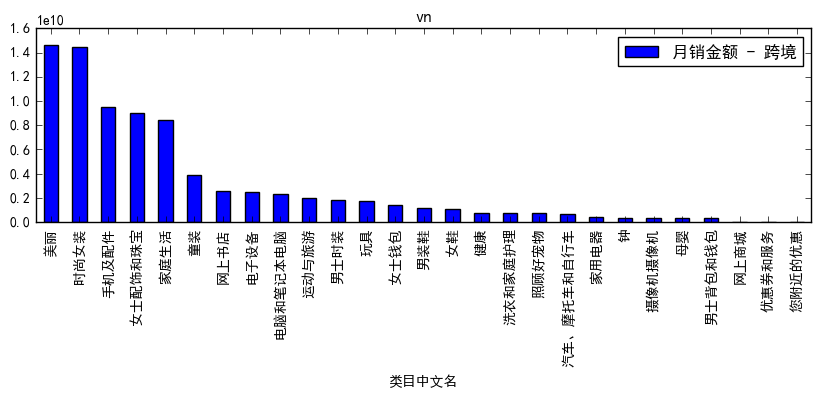

In [214]:
# 按销售额排名
df_country_vn.sort_values(by='月销金额 - 跨境', ascending=False).plot(kind='bar',
                                                                x='类目中文名',
                                                                y='月销金额 - 跨境',
                                                                rot=90,
                                                                figsize=(10,2.5),
                                                               title='vn')
plt.show()

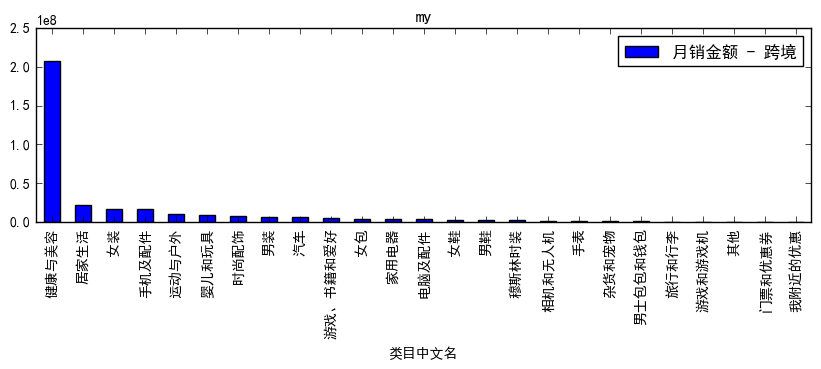

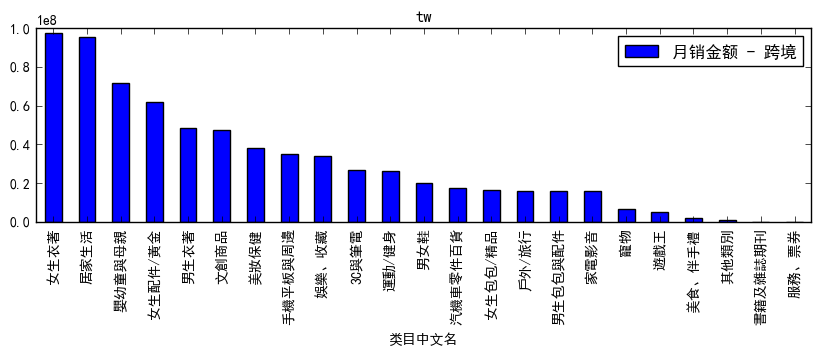

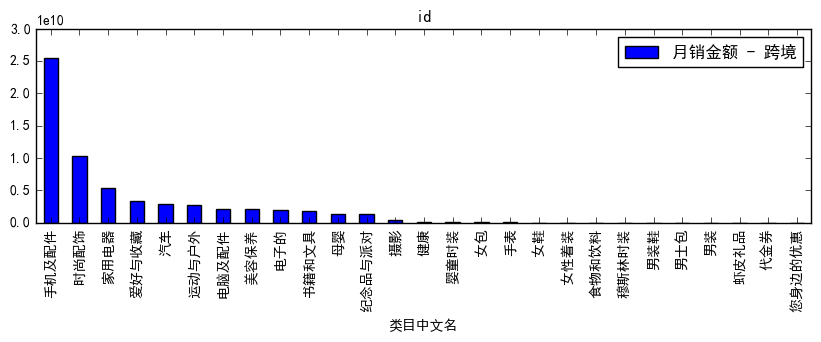

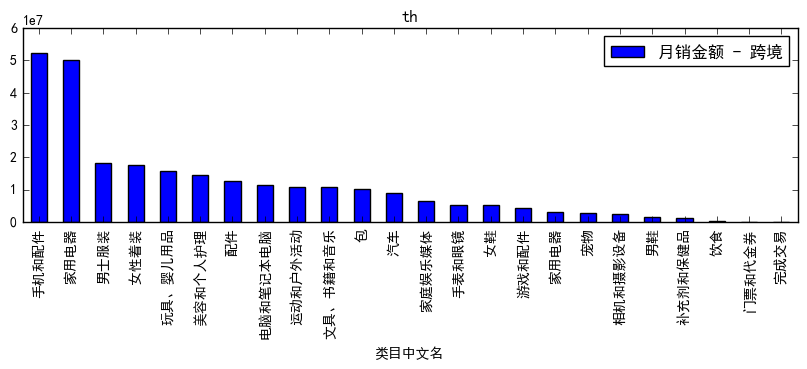

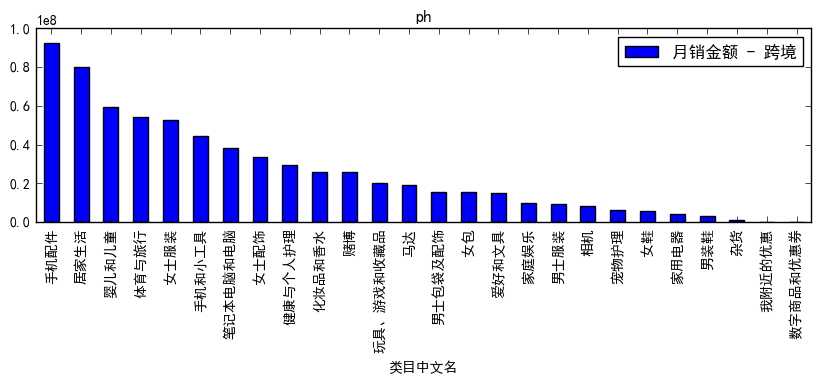

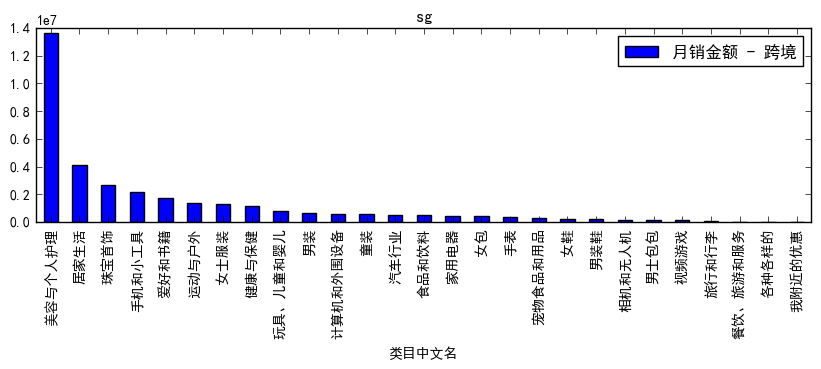

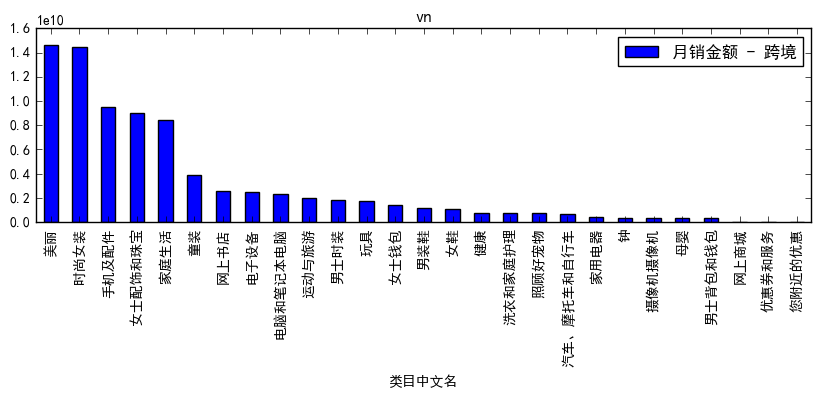

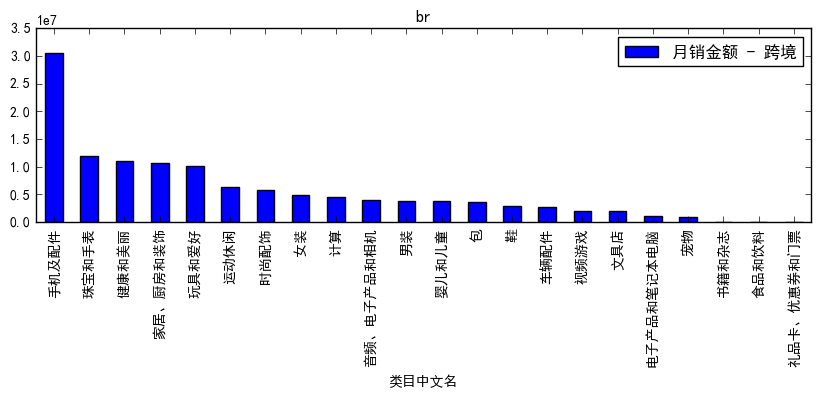

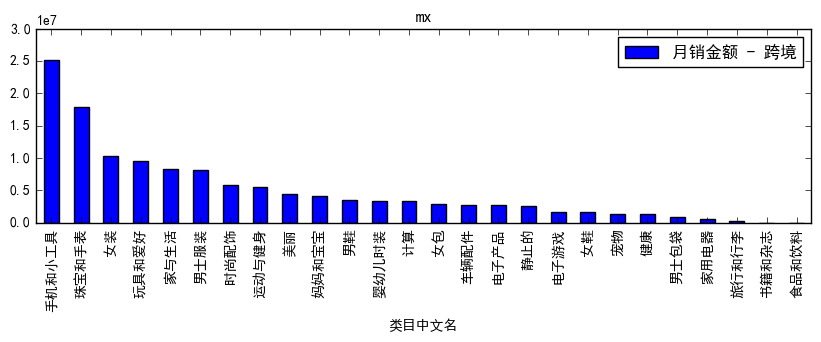

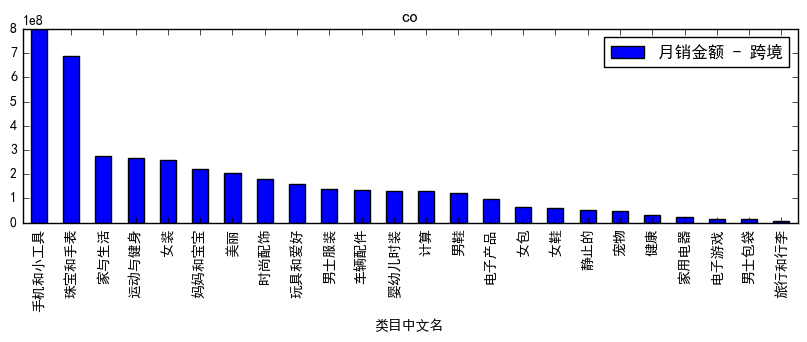

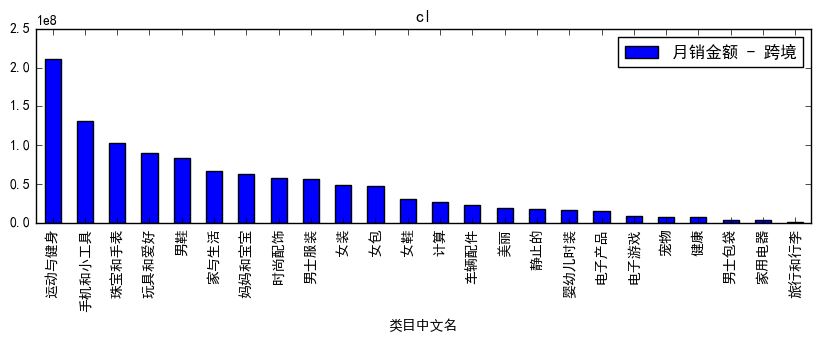

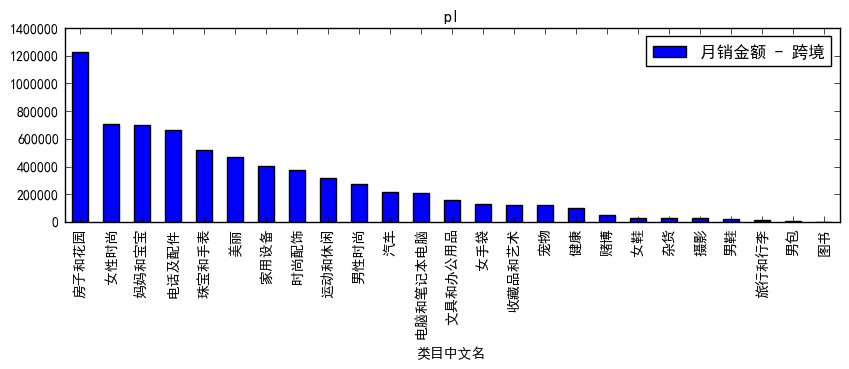

In [216]:
# 各国by cat跨境销售额
for country in country_list:
    # 按销售额排名
    df_country_selected = df_country_total[df_country_total['country'] == country]
    df_country_selected.sort_values(by='月销金额 - 跨境', ascending=False).plot(kind='bar',
                                                                    x='类目中文名',
                                                                    y='月销金额 - 跨境',
                                                                    rot=90,
                                                                    figsize=(10,2.5),
                                                                   title=country)
    plt.show()

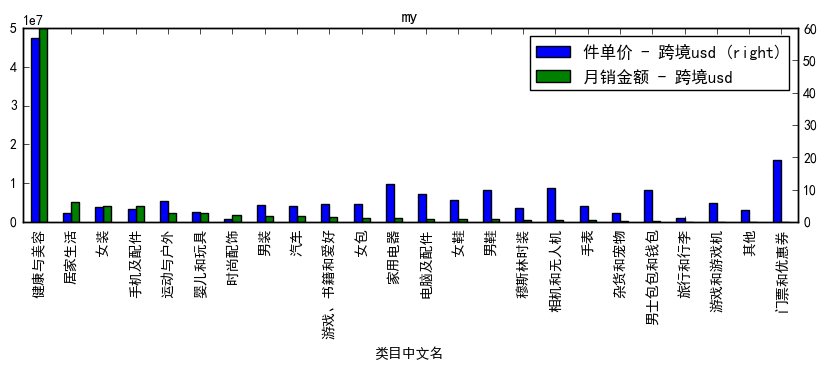

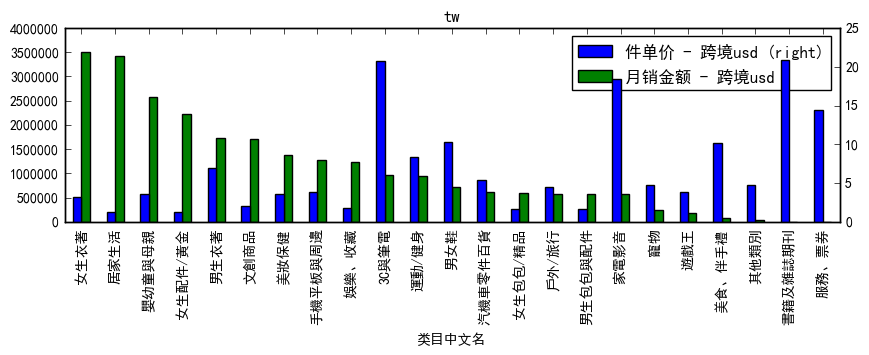

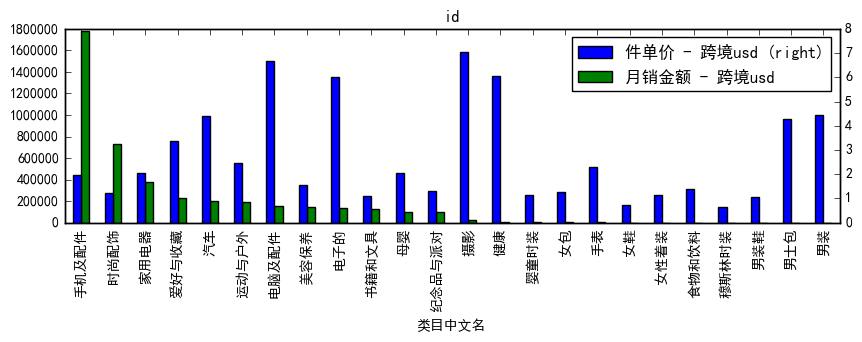

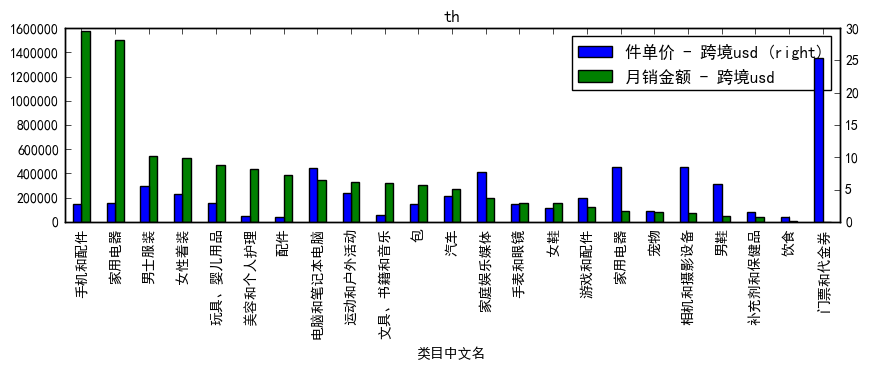

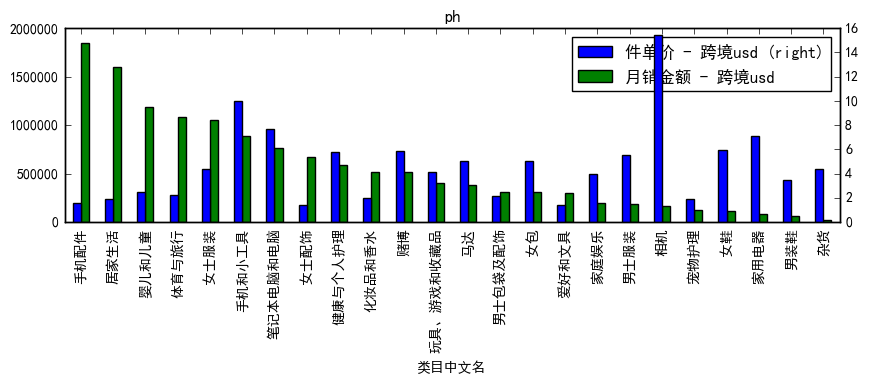

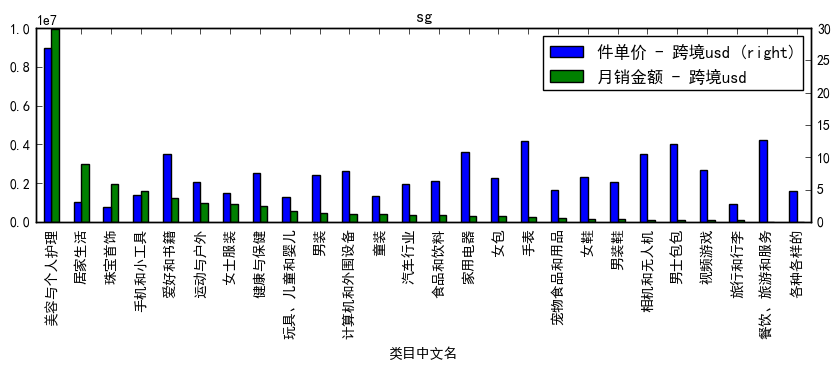

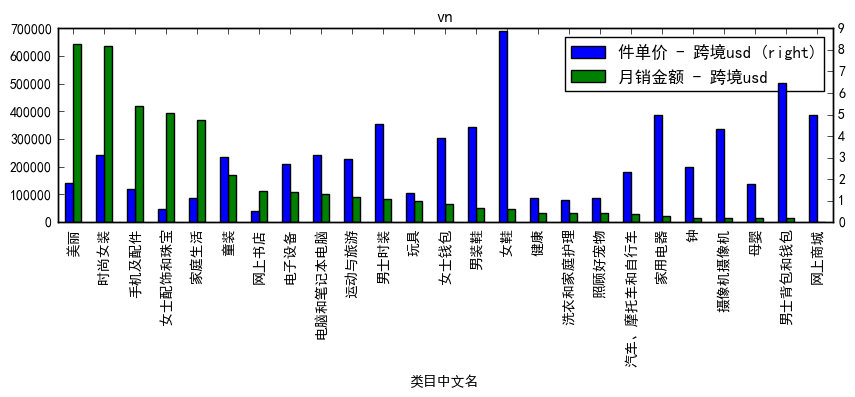

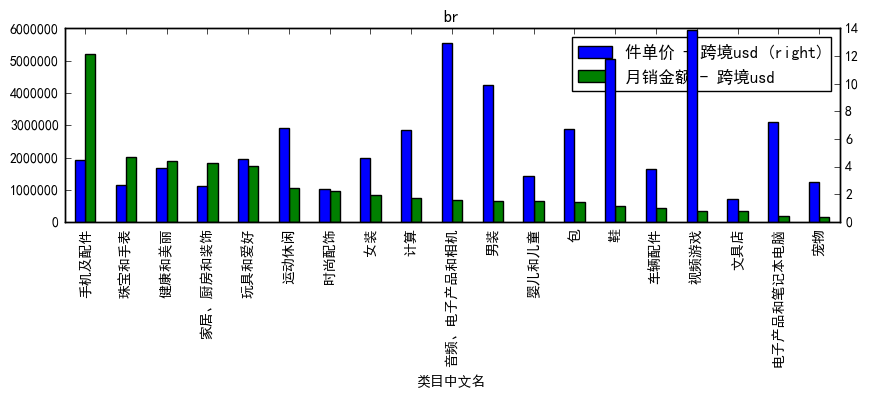

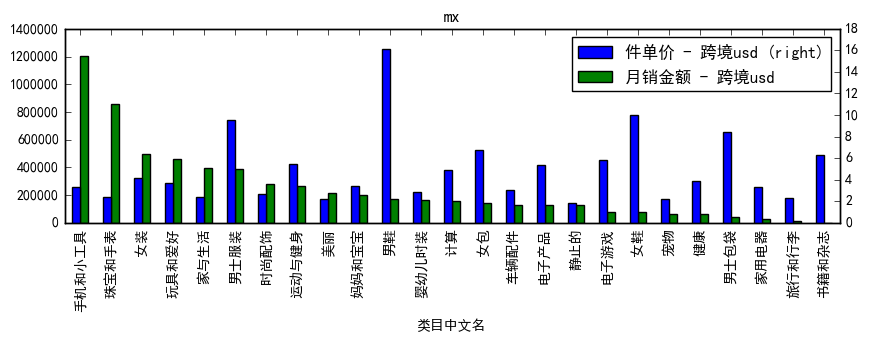

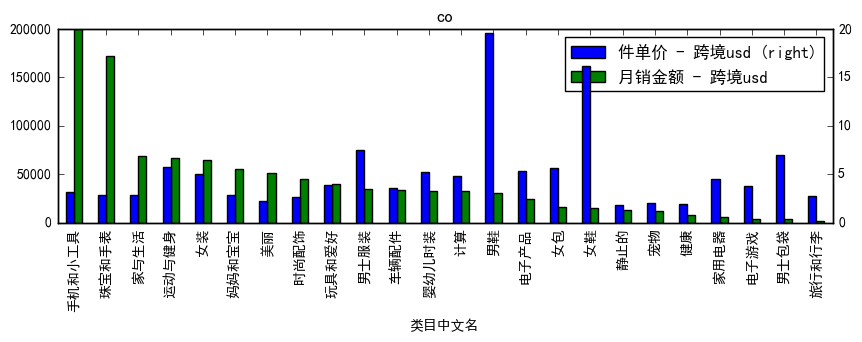

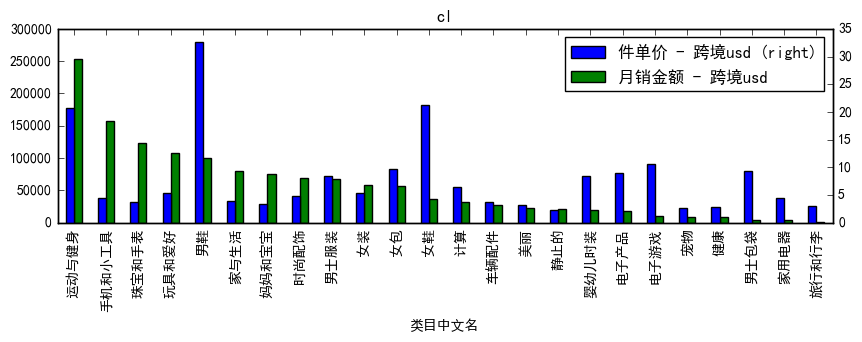

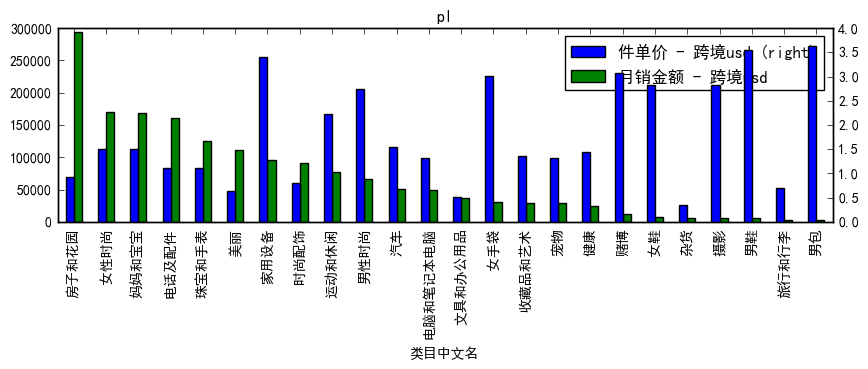

In [227]:
# 各国by cat跨境件单价
for country in country_list:
    # 按销售额排名
    df_country_selected = df_country_total[df_country_total['country'] == country]
    df_country_selected = df_country_selected[df_country_selected['月销件数 - 跨境'] > 0]
    
    df_country_selected['件单价 - 跨境usd'] = df_country_selected['月销金额 - 跨境usd'] / df_country_selected['月销件数 - 跨境']
    
    df_country_selected.sort_values(by='月销金额 - 跨境usd', ascending=False).plot(kind='bar',
                                                                    x='类目中文名',
                                                                    y=['件单价 - 跨境usd', '月销金额 - 跨境usd'],
                                                                            secondary_y=['件单价 - 跨境usd'],
                                                                    rot=90,
                                                                    figsize=(10,2.5),
                                                                   title=country)
    plt.show()